# EFA

In [3]:
from factor_analyzer import FactorAnalyzer

### Bartlett’s test for adequancy
We want a significant result to see if the covariance matrix is not the identity

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data.iloc[:,2:14])
chi_square_value, p_value

(27207.13233124789, 0.0)

### Number of factors

In [ ]:
# We want eigenvalues bigger than one (Kaiser criterion)
fa = FactorAnalyzer()
fa.fit(data.iloc[:,2:14])
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.42155674, 1.94673011, 1.5339463 , 1.12861699, 0.87915857,
       0.73601194, 0.71504163, 0.45009686, 0.42633371, 0.33053476,
       0.24986217, 0.18211023])

In [ ]:
fa.get_factor_variance()

(array([2.80329221, 1.67696559, 1.46869108]),
 array([0.23360768, 0.13974713, 0.12239092]),
 array([0.23360768, 0.37335482, 0.49574574]))

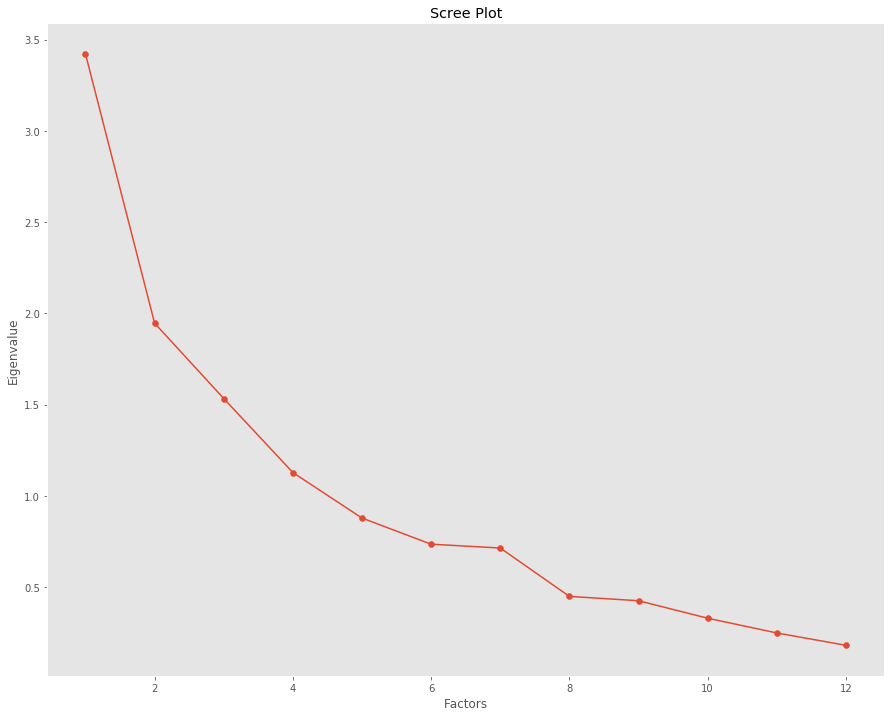

In [ ]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

### EFA

In [ ]:
# Create factor analysis object and perform factor analysis
EFA = FactorAnalyzer(n_factors=4, rotation='varimax')
EFA.fit(data.iloc[:,2:14])

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

[Text(0.5, 1, 'EFA loadings (b)')]

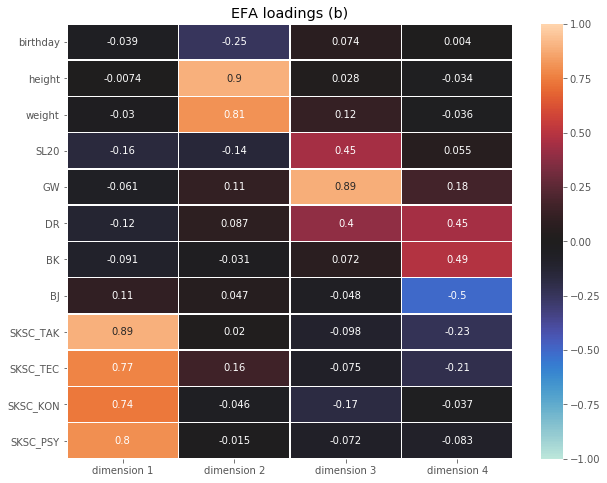

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=EFA.loadings_, annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0, xticklabels=["dimension 1", "dimension 2","dimension 3","dimension 4"], yticklabels=X_names).set(title='EFA loadings (b)')

In [ ]:
EFA.get_eigenvalues()

(array([3.42155674, 1.94673011, 1.5339463 , 1.12861699, 0.87915857,
        0.73601194, 0.71504163, 0.45009686, 0.42633371, 0.33053476,
        0.24986217, 0.18211023]),
 array([ 3.07445403,  1.65281601,  1.10380113,  0.46963868,  0.10765097,
         0.06739162,  0.00715528, -0.00634533, -0.01458477, -0.03114456,
        -0.05053049, -0.07959324]))

In [ ]:
EFA.get_communalities()

array([0.06741541, 0.80688361, 0.67635787, 0.24856135, 0.83684259,
       0.37815524, 0.24967131, 0.26684822, 0.85737311, 0.67352815,
       0.58396859, 0.65510387])

In [ ]:
EFA.get_factor_variance()
# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

(array([2.65213758, 1.59782461, 1.22477804, 0.8259691 ]),
 array([0.22101146, 0.13315205, 0.10206484, 0.06883076]),
 array([0.22101146, 0.35416352, 0.45622835, 0.52505911]))